In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [33]:
df = pd.read_csv("./normalized_data/1950-51_normalized.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   position         16 non-null     int64  
 1   team             16 non-null     object 
 2   points           16 non-null     float64
 3   won              16 non-null     float64
 4   lost             16 non-null     float64
 5   draw             16 non-null     float64
 6   played           16 non-null     float64
 7   goals_for        16 non-null     float64
 8   goals_against    16 non-null     float64
 9   goal_difference  16 non-null     float64
 10  year             16 non-null     int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 1.5+ KB
None


C:\Users\Sneha\AppData\Local\Temp\ipykernel_80852\3743763711.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")


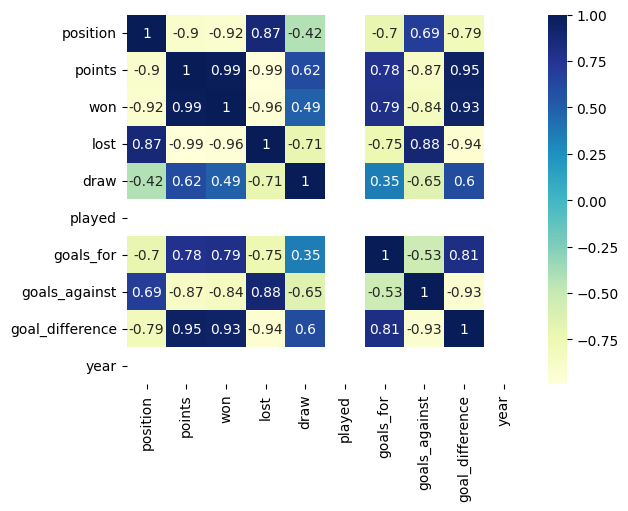

In [34]:
# Check for missing values and data types
print(df.info())

# Check for correlations between variables
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

# Define the features and target variable
X = df[['played', 'won', 'draw', 'lost', 'goals_for', 'goals_against', 'goal_difference', 'points']]
y = df['position']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# Create an instance of the linear regression model
lr_model = LinearRegression()

# Train the model using the training data
lr_model.fit(X_train, y_train)


LinearRegression()

In [36]:
# Use the trained model to predict on the test data
y_pred = lr_model.predict(X_test)

# Calculate the mean squared error and R-squared score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-squared Score: ", r2)


Mean Squared Error:  8.336435422721701
R-squared Score:  0.7266742484353541


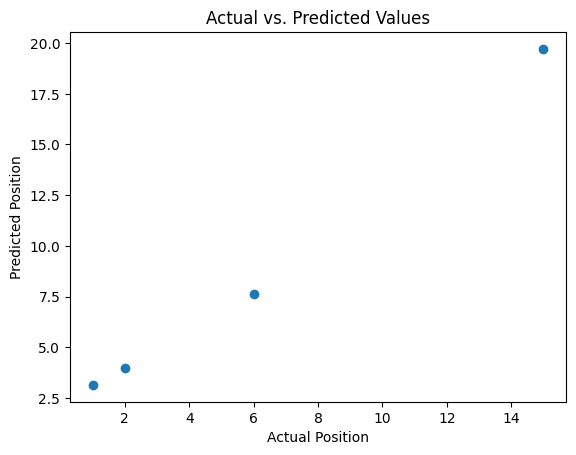

In [37]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Position")
plt.ylabel("Predicted Position")
plt.title("Actual vs. Predicted Values")
plt.show()

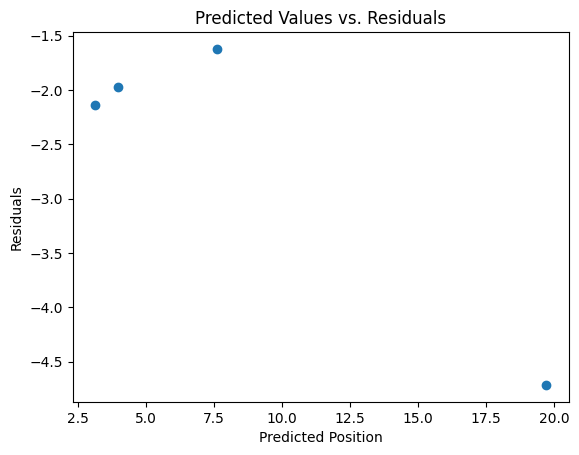

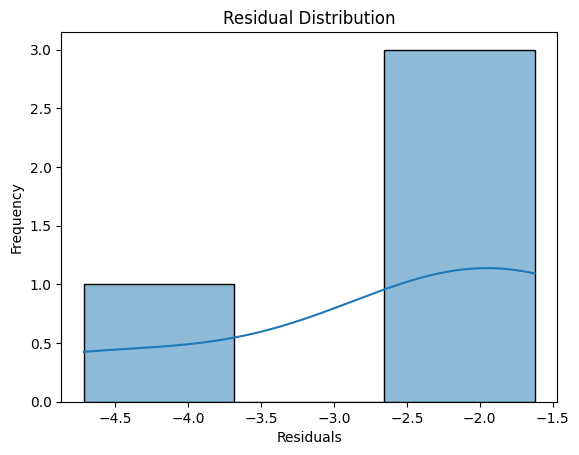

In [38]:
# Create a scatter plot of predicted values vs. residuals
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Position")
plt.ylabel("Residuals")
plt.title("Predicted Values vs. Residuals")
plt.show()

# Create a histogram of residuals
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


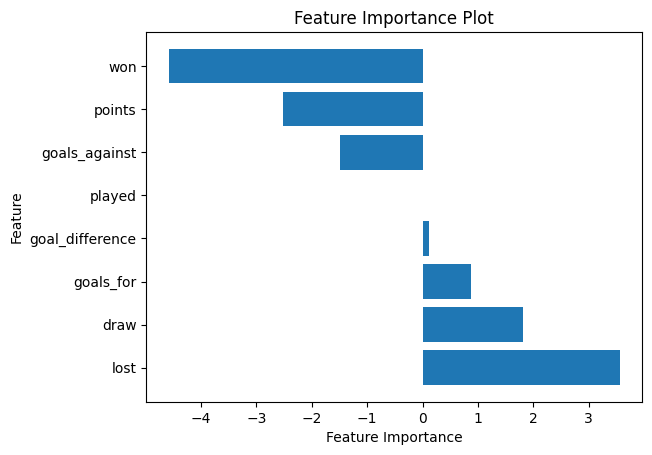

In [39]:
# Create a bar plot of feature importance
coef_df = pd.DataFrame({'feature': X.columns, 'importance': lr_model.coef_})
coef_df = coef_df.sort_values(by='importance', ascending=False)

plt.barh(coef_df['feature'], coef_df['importance'])
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance Plot")
plt.show()


In [40]:
from sklearn.metrics import accuracy_score

y_pred = lr_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred.round())

print("Accuracy:", accuracy)


Accuracy: 0.0


In [41]:
# Get the coefficients and intercept of the linear regression model
coef = lr_model.coef_
intercept = lr_model.intercept_

print("Coefficients:", coef)
print("Intercept:", intercept)


Coefficients: [ 0.         -4.58044656  1.81198129  3.55887667  0.8811515  -1.49682132
  0.1086257  -2.51420765]
Intercept: 11.020103481643346


In [42]:
# Get the linear regression equation
equation = "y = " + str(round(intercept, 2)) + " + "

for i in range(len(X.columns)):
    equation += str(round(coef[i], 2)) + "*" + X.columns[i]
    
print("Linear Regression Equation: ", equation)


Linear Regression Equation:  y = 11.02 + 0.0*played-4.58*won1.81*draw3.56*lost0.88*goals_for-1.5*goals_against0.11*goal_difference-2.51*points
